#***Linear Regression***

In [1]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#8:2

In [3]:
# Đọc file dữ liệu tiền mã hóa Binance và chia train test validate theo tỉ lệ 8:1:1
df = pd.read_csv('/content/Bnb.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1536
Test data size: 384


In [4]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [6]:
# Đánh giá độ chính xác validate, test

test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 178.20613534266866
Testing RMSE: 196.3856980744815
Testing MAPE: 0.37000094108466786


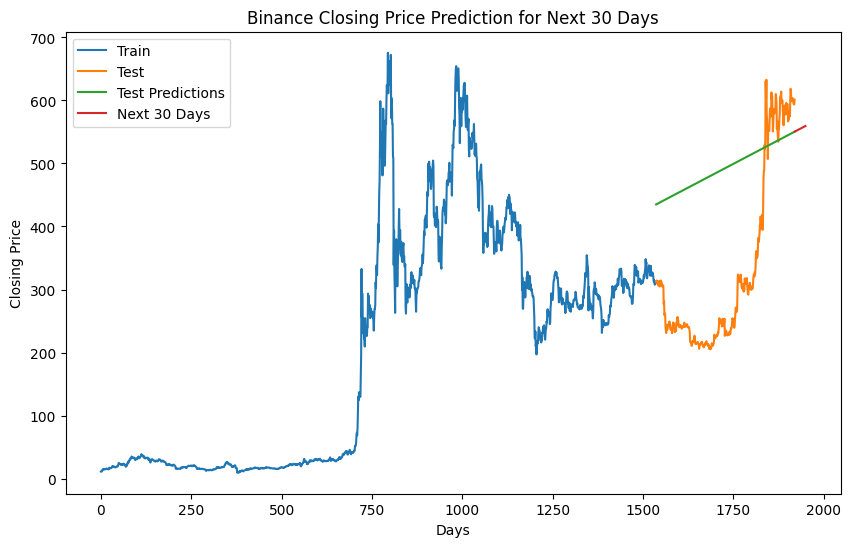

Predicted closing prices for the next 30 days:
[550.68508186 550.98628576 551.28748967 551.58869358 551.88989748
 552.19110139 552.4923053  552.7935092  553.09471311 553.39591702
 553.69712093 553.99832483 554.29952874 554.60073265 554.90193655
 555.20314046 555.50434437 555.80554827 556.10675218 556.40795609
 556.70915999 557.0103639  557.31156781 557.61277172 557.91397562
 558.21517953 558.51638344 558.81758734 559.11879125 559.41999516]


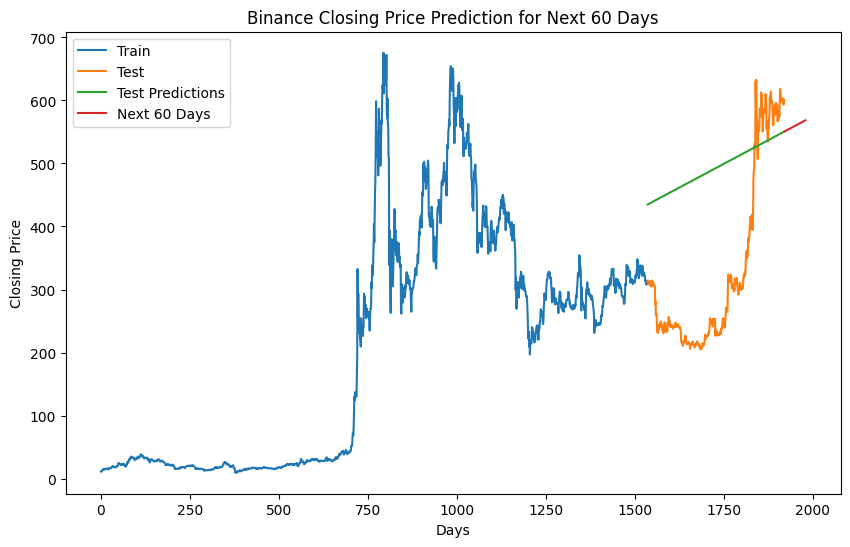

Predicted closing prices for the next 60 days:
[550.68508186 550.98628576 551.28748967 551.58869358 551.88989748
 552.19110139 552.4923053  552.7935092  553.09471311 553.39591702
 553.69712093 553.99832483 554.29952874 554.60073265 554.90193655
 555.20314046 555.50434437 555.80554827 556.10675218 556.40795609
 556.70915999 557.0103639  557.31156781 557.61277172 557.91397562
 558.21517953 558.51638344 558.81758734 559.11879125 559.41999516
 559.72119906 560.02240297 560.32360688 560.62481078 560.92601469
 561.2272186  561.5284225  561.82962641 562.13083032 562.43203423
 562.73323813 563.03444204 563.33564595 563.63684985 563.93805376
 564.23925767 564.54046157 564.84166548 565.14286939 565.44407329
 565.7452772  566.04648111 566.34768502 566.64888892 566.95009283
 567.25129674 567.55250064 567.85370455 568.15490846 568.45611236]


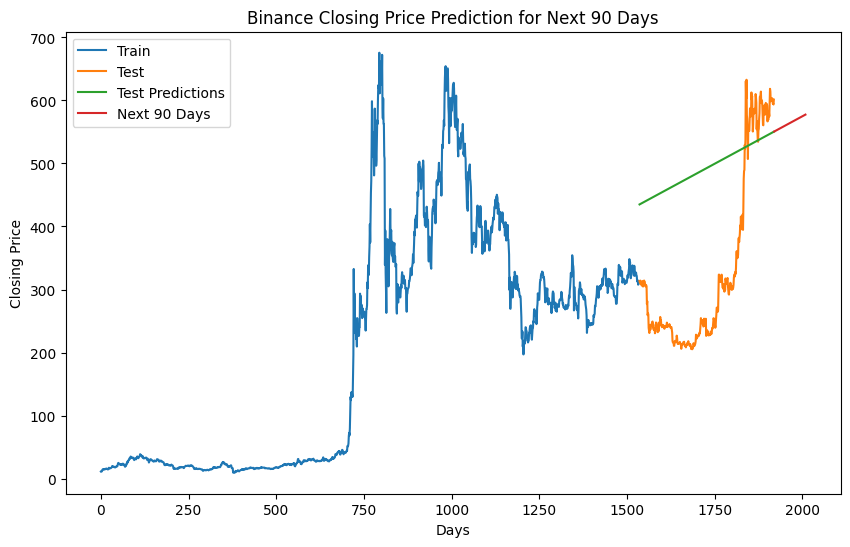

Predicted closing prices for the next 90 days:
[550.68508186 550.98628576 551.28748967 551.58869358 551.88989748
 552.19110139 552.4923053  552.7935092  553.09471311 553.39591702
 553.69712093 553.99832483 554.29952874 554.60073265 554.90193655
 555.20314046 555.50434437 555.80554827 556.10675218 556.40795609
 556.70915999 557.0103639  557.31156781 557.61277172 557.91397562
 558.21517953 558.51638344 558.81758734 559.11879125 559.41999516
 559.72119906 560.02240297 560.32360688 560.62481078 560.92601469
 561.2272186  561.5284225  561.82962641 562.13083032 562.43203423
 562.73323813 563.03444204 563.33564595 563.63684985 563.93805376
 564.23925767 564.54046157 564.84166548 565.14286939 565.44407329
 565.7452772  566.04648111 566.34768502 566.64888892 566.95009283
 567.25129674 567.55250064 567.85370455 568.15490846 568.45611236
 568.75731627 569.05852018 569.35972408 569.66092799 569.9621319
 570.2633358  570.56453971 570.86574362 571.16694753 571.46815143
 571.76935534 572.07055925 572

In [7]:
# Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Binance Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)

#7:3

In [8]:
# Đọc file dữ liệu tiền mã hóa Binance và chia train test validate theo tỉ lệ 7:2:1
df = pd.read_csv('/content/Bnb.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1344
Test data size: 576


In [9]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [11]:
# Đánh giá độ chính xác validate, test

test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 230.49403916163314
Testing RMSE: 250.22907317171314
Testing MAPE: 0.42096372652765895


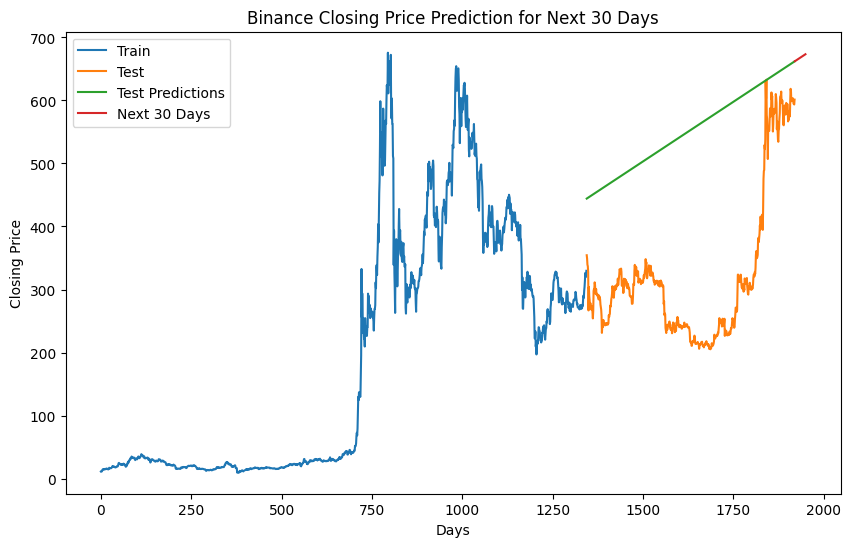

Predicted closing prices for the next 30 days:
[662.28192537 662.66039335 663.03886133 663.41732931 663.79579729
 664.17426527 664.55273325 664.93120123 665.30966921 665.68813719
 666.06660517 666.44507315 666.82354113 667.20200911 667.58047709
 667.95894507 668.33741305 668.71588103 669.09434901 669.47281699
 669.85128497 670.22975295 670.60822093 670.98668891 671.36515689
 671.74362486 672.12209284 672.50056082 672.8790288  673.25749678]


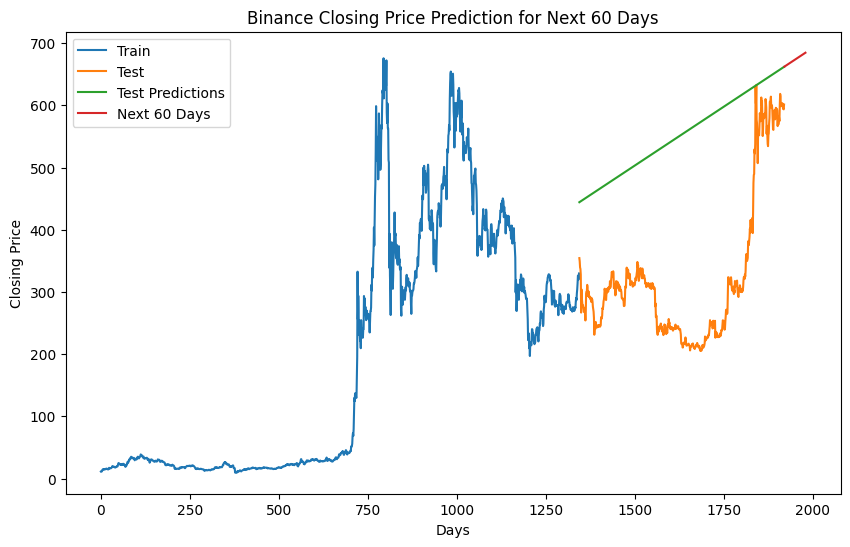

Predicted closing prices for the next 60 days:
[662.28192537 662.66039335 663.03886133 663.41732931 663.79579729
 664.17426527 664.55273325 664.93120123 665.30966921 665.68813719
 666.06660517 666.44507315 666.82354113 667.20200911 667.58047709
 667.95894507 668.33741305 668.71588103 669.09434901 669.47281699
 669.85128497 670.22975295 670.60822093 670.98668891 671.36515689
 671.74362486 672.12209284 672.50056082 672.8790288  673.25749678
 673.63596476 674.01443274 674.39290072 674.7713687  675.14983668
 675.52830466 675.90677264 676.28524062 676.6637086  677.04217658
 677.42064456 677.79911254 678.17758052 678.5560485  678.93451648
 679.31298446 679.69145244 680.06992042 680.4483884  680.82685638
 681.20532436 681.58379234 681.96226031 682.34072829 682.71919627
 683.09766425 683.47613223 683.85460021 684.23306819 684.61153617]


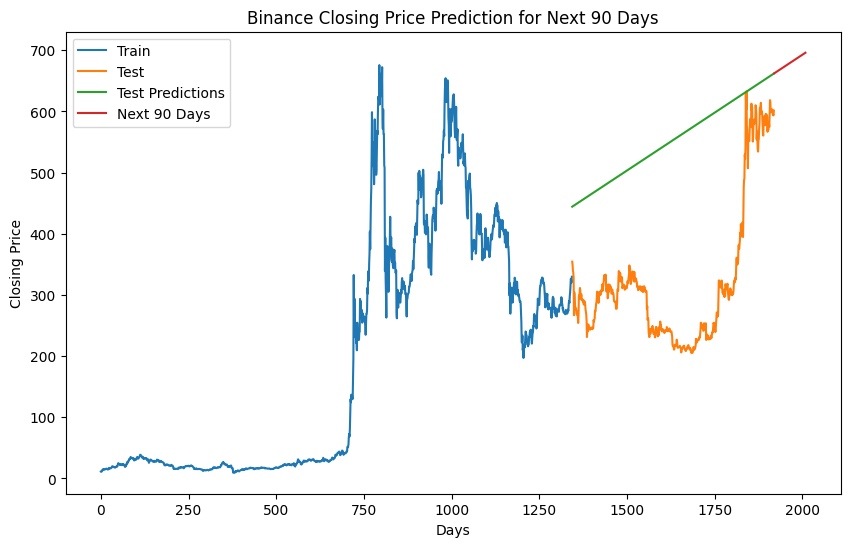

Predicted closing prices for the next 90 days:
[662.28192537 662.66039335 663.03886133 663.41732931 663.79579729
 664.17426527 664.55273325 664.93120123 665.30966921 665.68813719
 666.06660517 666.44507315 666.82354113 667.20200911 667.58047709
 667.95894507 668.33741305 668.71588103 669.09434901 669.47281699
 669.85128497 670.22975295 670.60822093 670.98668891 671.36515689
 671.74362486 672.12209284 672.50056082 672.8790288  673.25749678
 673.63596476 674.01443274 674.39290072 674.7713687  675.14983668
 675.52830466 675.90677264 676.28524062 676.6637086  677.04217658
 677.42064456 677.79911254 678.17758052 678.5560485  678.93451648
 679.31298446 679.69145244 680.06992042 680.4483884  680.82685638
 681.20532436 681.58379234 681.96226031 682.34072829 682.71919627
 683.09766425 683.47613223 683.85460021 684.23306819 684.61153617
 684.99000415 685.36847213 685.74694011 686.12540809 686.50387607
 686.88234405 687.26081203 687.63928001 688.01774799 688.39621597
 688.77468395 689.15315193 68

In [12]:
# Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Binance Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)

#6:4

In [13]:
# Đọc file dữ liệu tiền mã hóa Binance và chia train test validate theo tỉ lệ 6:2:2
df = pd.read_csv('/content/Bnb.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1152
Test data size: 768


In [14]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [16]:
# Đánh giá độ chính xác validate, test

test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 345.9738904877375
Testing RMSE: 363.8650068513259
Testing MAPE: 0.5211408613386528


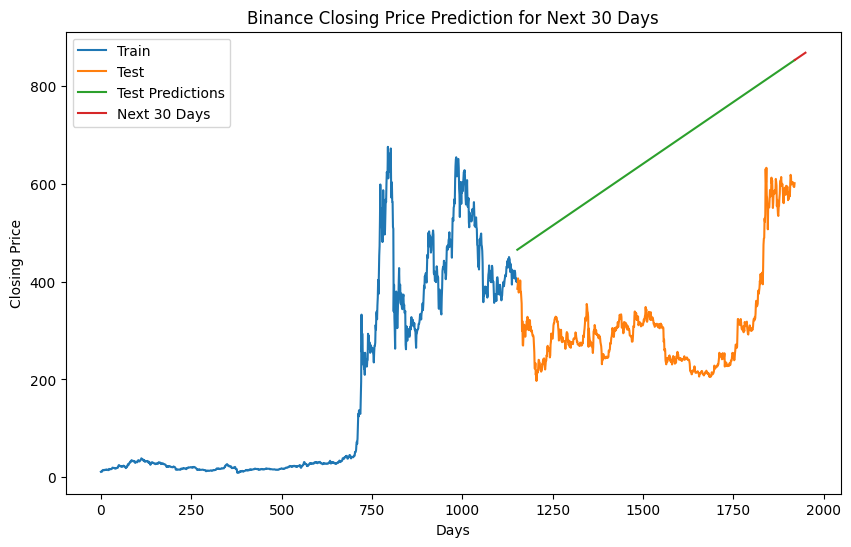

Predicted closing prices for the next 30 days:
[853.45661817 853.96203348 854.46744879 854.9728641  855.47827941
 855.98369472 856.48911003 856.99452534 857.49994065 858.00535596
 858.51077127 859.01618658 859.52160189 860.0270172  860.53243251
 861.03784782 861.54326313 862.04867844 862.55409375 863.05950906
 863.56492437 864.07033968 864.57575499 865.0811703  865.58658561
 866.09200092 866.59741623 867.10283154 867.60824685 868.11366216]


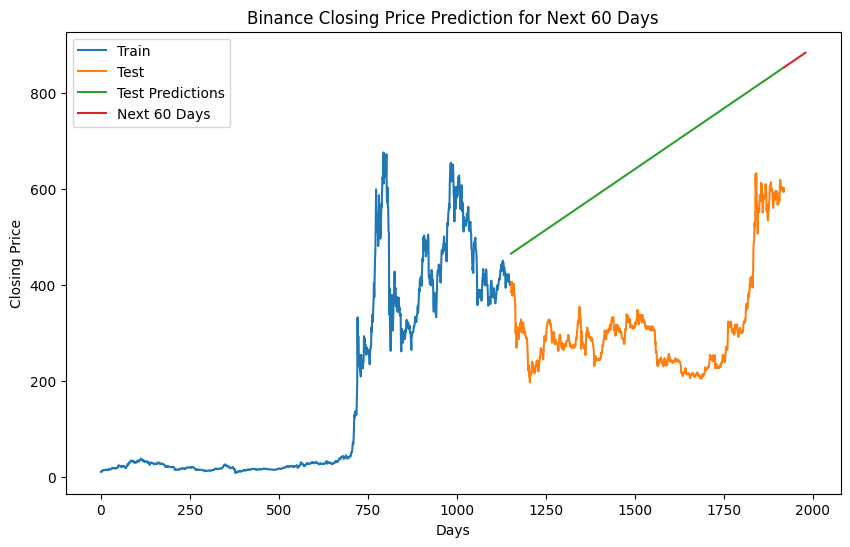

Predicted closing prices for the next 60 days:
[853.45661817 853.96203348 854.46744879 854.9728641  855.47827941
 855.98369472 856.48911003 856.99452534 857.49994065 858.00535596
 858.51077127 859.01618658 859.52160189 860.0270172  860.53243251
 861.03784782 861.54326313 862.04867844 862.55409375 863.05950906
 863.56492437 864.07033968 864.57575499 865.0811703  865.58658561
 866.09200092 866.59741623 867.10283154 867.60824685 868.11366216
 868.61907747 869.12449278 869.62990809 870.1353234  870.64073871
 871.14615402 871.65156933 872.15698464 872.66239995 873.16781526
 873.67323057 874.17864588 874.68406119 875.1894765  875.69489181
 876.20030712 876.70572244 877.21113775 877.71655306 878.22196837
 878.72738368 879.23279899 879.7382143  880.24362961 880.74904492
 881.25446023 881.75987554 882.26529085 882.77070616 883.27612147]


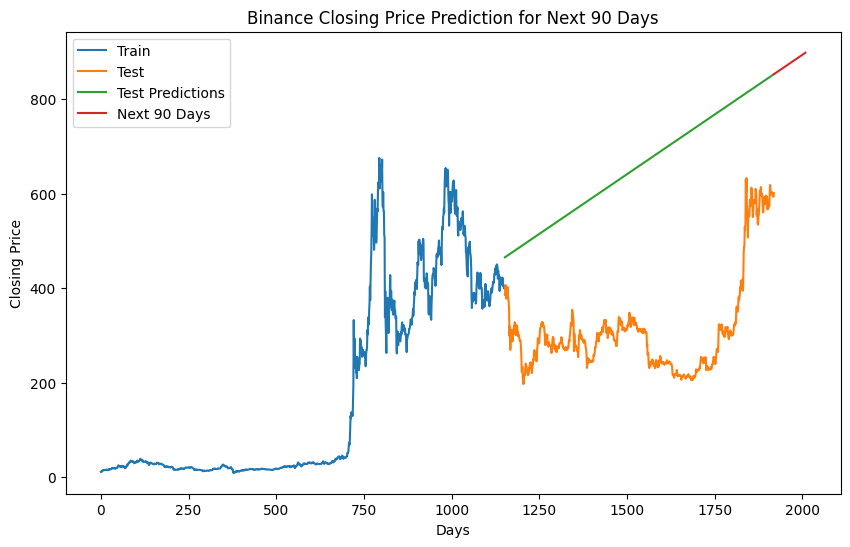

Predicted closing prices for the next 90 days:
[853.45661817 853.96203348 854.46744879 854.9728641  855.47827941
 855.98369472 856.48911003 856.99452534 857.49994065 858.00535596
 858.51077127 859.01618658 859.52160189 860.0270172  860.53243251
 861.03784782 861.54326313 862.04867844 862.55409375 863.05950906
 863.56492437 864.07033968 864.57575499 865.0811703  865.58658561
 866.09200092 866.59741623 867.10283154 867.60824685 868.11366216
 868.61907747 869.12449278 869.62990809 870.1353234  870.64073871
 871.14615402 871.65156933 872.15698464 872.66239995 873.16781526
 873.67323057 874.17864588 874.68406119 875.1894765  875.69489181
 876.20030712 876.70572244 877.21113775 877.71655306 878.22196837
 878.72738368 879.23279899 879.7382143  880.24362961 880.74904492
 881.25446023 881.75987554 882.26529085 882.77070616 883.27612147
 883.78153678 884.28695209 884.7923674  885.29778271 885.80319802
 886.30861333 886.81402864 887.31944395 887.82485926 888.33027457
 888.83568988 889.34110519 88

In [17]:
# Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    last_index = df.index[-1]
    x_future = np.array(range(last_index+1, last_index+1+days)).reshape(-1, 1)
    y_future = model.predict(x_future)

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(range(last_index+1, last_index+1+days), y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Binance Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future)